# *Setup environment*

In [ ]:
!pip install autodistill
!pip install autodistill_clip
!pip install autodistill_grounded_sam
!pip install supervision
!pip install opencv-python
!pip install roboflow
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 8.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.4/778.4 kB 8.3 MB/s eta 0:00:00


In [ ]:
from autodistill_clip import CLIP
from autodistill.detection import CaptionOntology
from autodistill_grounded_sam import GroundedSAM
import supervision as sv
import torch
from autodistill.core.composed_detection_model import ComposedDetectionModel
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# was_deterministic = torch.are_deterministic_algorithms_enabled()

# torch.use_deterministic_algorithms(True)

# All Togather




In [ ]:
classes = ['face', 'eyebrows', 'eyes', 'hair', 'mouth', 'neck', 'ears', 'nose', 'glasses']


SAMCLIP = ComposedDetectionModel(
    detection_model=GroundedSAM(
        CaptionOntology({'face':'face',
                         'eyebrows':'eyebrows',
                         'eyes':'eyes',
                         'hair':'hair',
                         'mouth':'mouth',
                         'neck':'neck',
                         'ears':'ears',
                         'nose':'nose',
                         'glasses':'glasses'})
    ),
    classification_model=CLIP(
        CaptionOntology({k: k for k in classes})
    )
)


trying to load grounding dino directly
downloading dino model weights


torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)


final text_encoder_type: bert-base-uncased



The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

`resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 119MiB/s]


In [ ]:
IMAGE = "/content/photo_2024-05-26 11.59.38.jpeg"

results = SAMCLIP.predict(IMAGE)

image = cv2.imread(IMAGE)

annotator = sv.MaskAnnotator()
label_annotator = sv.LabelAnnotator()


The `device` argument is deprecated and will be removed in v5 of Transformers.
torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
None of the inputs have requires_grad=True. Gradients will be None
The `device` argument is deprecated and will be removed in v5 of Transformers.
torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
None of the inputs have requires_grad=True. Gradients will 

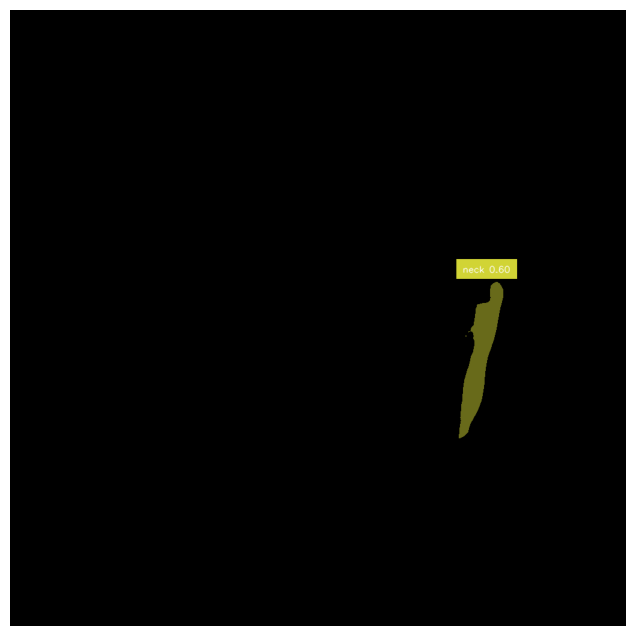

In [ ]:
# combined_mask = np.zeros_like(image)
# combined_labels = []

# annotations = results[10]

# labels = [f"{CLASSES[class_id]} {confidence:0.2f}" for xyxy, mask, confidence, class_id, _, data in annotations]

# annotated_frame = annotator.annotate(scene=np.zeros_like(image), detections=annotations)
# annotated_frame = label_annotator.annotate(scene=annotated_frame, labels=labels, detections=annotations)

# combined_mask += annotated_frame

# combined_labels.extend(labels)

# sv.plot_image(combined_mask, size=(8, 8))

{'face': [], 'eyebrows': [2, 4, 13], 'eyes': [0, 5, 6, 7], 'hair': [], 'mouth': [8], 'neck': [3], 'ears': [], 'nose': [1, 9, 10, 11, 12, 14], 'glasses': []}


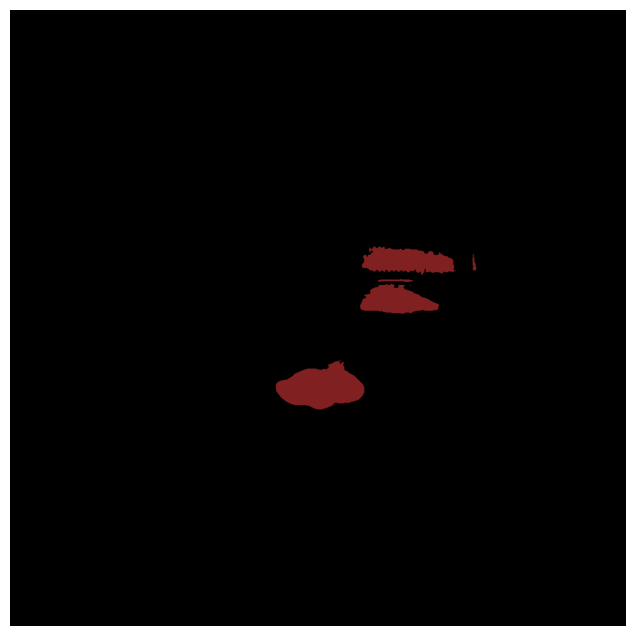

eyebrows


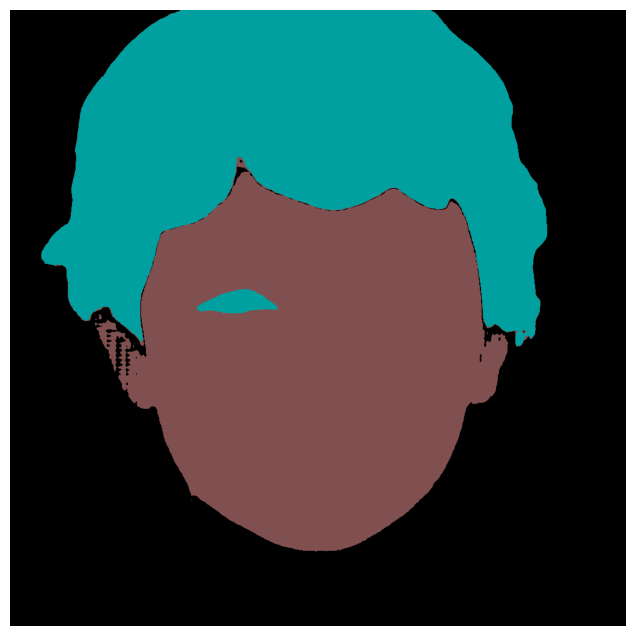

eyes


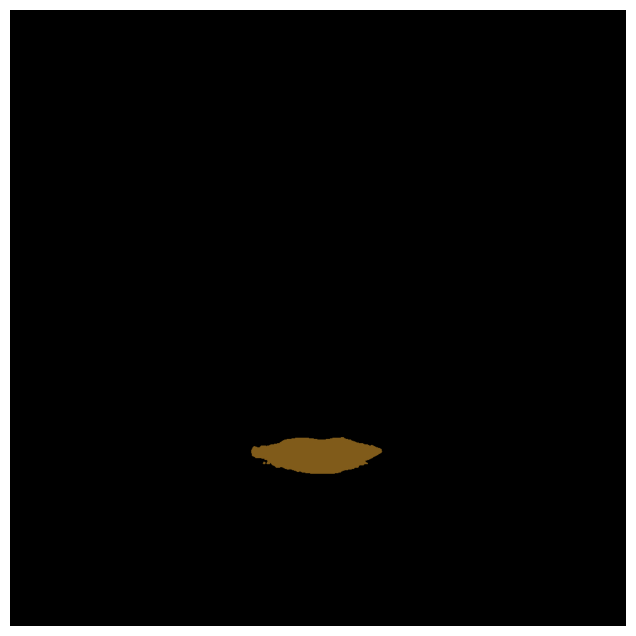

mouth


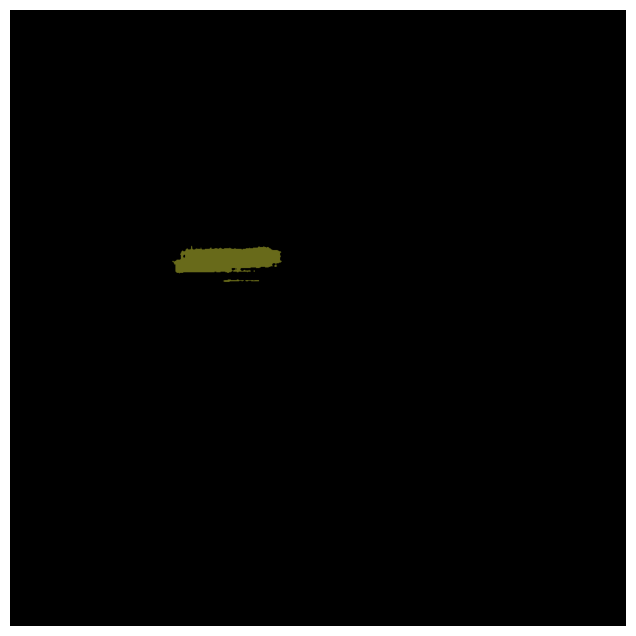

neck


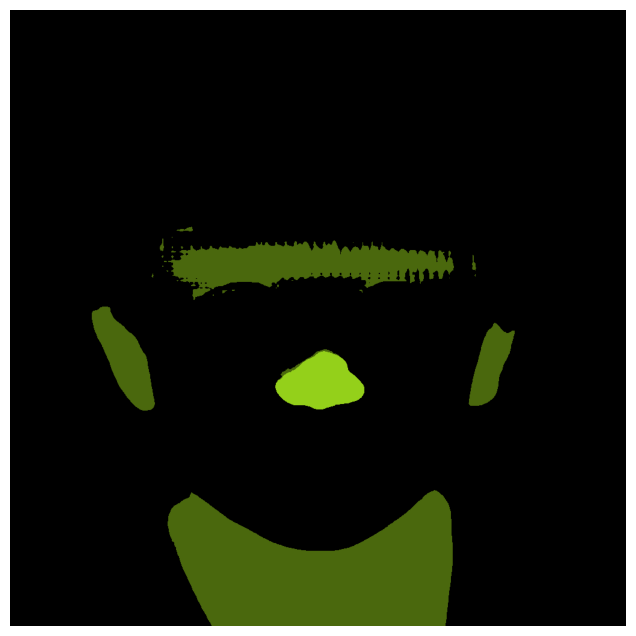

nose


In [ ]:
image = cv2.imread(IMAGE)

annotator = sv.MaskAnnotator()
label_annotator = sv.LabelAnnotator()

dictt = {'face':[],
          'eyebrows':[],
          'eyes':[],
          'hair':[],
          'mouth':[],
          'neck':[],
          'ears':[],
          'nose':[],
          'glasses':[]}

for i in range(len(results)):
  labels = [
      f"{classes[class_id]} {confidence:0.2f}"
      for xyxy, mask, confidence, class_id, _, data in results[i]
  ]

  dictt[labels[0].split()[0]].append(i)

print(dictt)

for i in classes:
  combined_mask = np.zeros_like(image)
  if len(dictt[i]) != 0:
    for j in range(len(dictt[i])):
      labels = [
          f"{classes[class_id]} {confidence:0.2f}"
          for xyxy, mask, confidence, class_id, _, data in results[dictt[i][j]]
      ]

      MASK = annotator.annotate(scene=np.zeros_like(image), detections=results[dictt[i][j]])

      combined_mask += MASK

    sv.plot_image(combined_mask, size=(8, 8))
    print(i)
    Image.fromarray(combined_mask).save(f"/content/asd/{i}.jpg")




In [ ]:
import cv2

classes_new = []
for i in classes:
  classes_new.append(i)

for i in classes:
  if dictt[i] == []:
    classes_new.remove(i)

print(classes)
print(classes_new)



['face', 'eyebrows', 'eyes', 'hair', 'mouth', 'neck', 'ears', 'nose', 'glasses']
['eyebrows', 'eyes', 'mouth', 'neck', 'nose']


In [ ]:
def FACE_without_intersections():
  FACE = cv2.imread("/content/asd/face.jpg", cv2.IMREAD_GRAYSCALE)
  for i in classes_new:
    if i != 'face':
      instance = cv2.imread(f"/content/asd/{i}.jpg", cv2.IMREAD_GRAYSCALE)
      intersection = cv2.bitwise_and(FACE, instance)
      FACE = cv2.bitwise_and(FACE, cv2.bitwise_not(intersection))
  return FACE

def NECK_without_intersections():
  NECK = cv2.imread("/content/asd/neck.jpg", cv2.IMREAD_GRAYSCALE)

  instance = cv2.imread(f"/content/asd/nose.jpg", cv2.IMREAD_GRAYSCALE)
  intersection = cv2.bitwise_and(NECK, instance)
  NECK = cv2.bitwise_and(NECK, cv2.bitwise_not(instance))

  return NECK


def GLASSES_without_intersections():
  GLASSES = cv2.imread("/content/asd/glasses.jpg", cv2.IMREAD_GRAYSCALE)

  instance = cv2.imread(f"/content/asd/eyes.jpg", cv2.IMREAD_GRAYSCALE)
  intersection = cv2.bitwise_and(GLASSES, instance)
  GLASSES = cv2.bitwise_and(GLASSES, cv2.bitwise_not(instance))

  return GLASSES


def ALL_wihtout_intersection(CLASS):
  CLASS = cv2.imread(f"/content/asd/{CLASS}.jpg", cv2.IMREAD_GRAYSCALE)
  return CLASS

for i in classes_new:
  if i == 'face':
    FACE = FACE_without_intersections()
    Image.fromarray(FACE).save("/content/asd/face_WI.jpg")
  elif i == 'neck':
    NECK = NECK_without_intersections()
    Image.fromarray(NECK).save("/content/asd/neck_WI.jpg")
  elif i == 'glasses':
    GLASSES = GLASSES_without_intersections()
    Image.fromarray(GLASSES).save("/content/asd/glasses_WI.jpg")
  else:
    CLASS = ALL_wihtout_intersection(i)
    Image.fromarray(CLASS).save(f"/content/asd/{i}_WI.jpg")


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

COLORS = {'face':[255, 0, 0],
          'eyebrows':[0, 255, 0],
          'eyes':[0, 0, 255],
          'hair':[255, 255, 0],
          'mouth':[0, 255, 255],
          'neck':[255, 0, 255],
          'ears':[255, 165, 0],
          'nose':[128, 0, 128],
          'glasses':[165, 42, 42]}

def paint(image_path, color):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    mask = np.any(image >= 50, axis=2)
    blacked = np.any(image < 50, axis=2)

    image[mask] = color
    image[blacked] = [0, 0, 0]

    return image

img = cv2.imread('/content/asd/face_WI.jpg')

combined_mask = np.zeros_like(img)

for i in range(len(classes_new)):
  print(classes_new[i])
  path = f"/content/asd/{classes_new[i]}_WI.jpg"
  mask = cv2.imread(path)

  # a = COLORS[classes_new[i]]
  # b = []
  # for c in COLORS[classes_new[i]]:
  #   b.append(c)
  # b.reverse()

  mask = paint(path, COLORS[classes_new[i]])
  combined_mask += mask

sv.plot_image(combined_mask, size=(32, 32))


eyebrows


ValueError: non-broadcastable output operand with shape () doesn't match the broadcast shape (1024,1024,3)

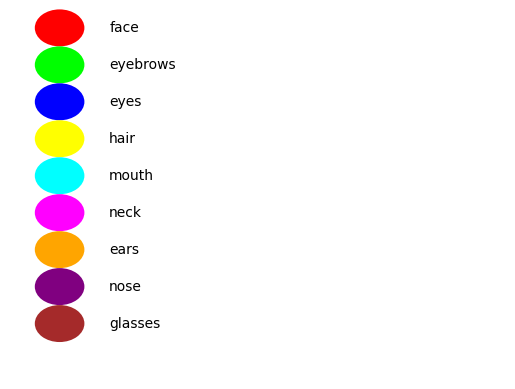

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

COLORS = {
    'face': [255, 0, 0],
    'eyebrows': [0, 255, 0],
    'eyes': [0, 0, 255],
    'hair': [255, 255, 0],
    'mouth': [0, 255, 255],
    'neck': [255, 0, 255],
    'ears': [255, 165, 0],
    'nose': [128, 0, 128],
    'glasses': [165, 42, 42]
}

fig, ax = plt.subplots()
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.axis('off')

# The radius for each circle in the legend
radius = 5

# Draw each circle and label
for idx, (label, color) in enumerate(COLORS.items()):
    # Convert the 0-255 RGB values to 0-1 range for matplotlib
    color_normalized = [c/255.0 for c in color]
    # Calculate the y position for each circle
    y_position = 95 - idx * 10  # Adjust spacing to fit your needs
    # Draw a circle
    circle = plt.Circle((10, y_position), radius, color=color_normalized, ec='none')
    ax.add_patch(circle)
    # Add text label
    ax.text(20, y_position, label, verticalalignment='center', color='black')

# Show the plot
plt.savefig('legend_figure.jpg', dpi=600, bbox_inches='tight')

plt.show()


In [ ]:
plt.savefig('legend_figure.jpg', dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

In [ ]:
Image.fromarray(combined_mask).save("COMBINED.jpg")

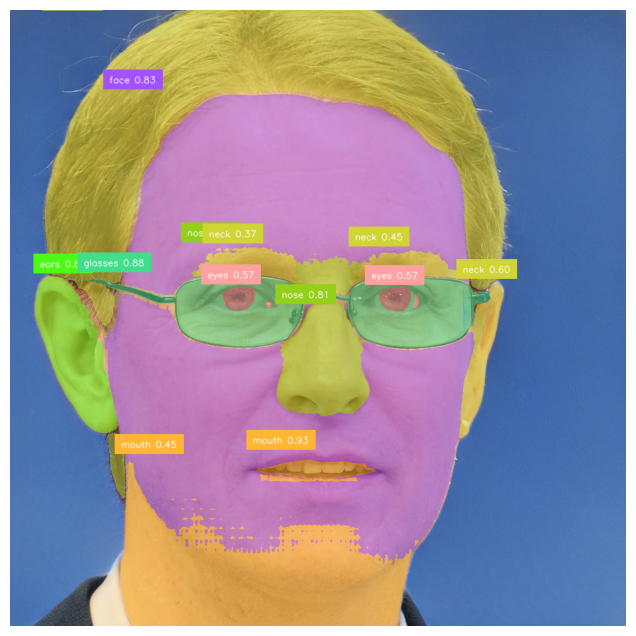

In [ ]:
labels = [
    f"{classes[class_id]} {confidence:0.2f}"
    for xyxy, mask, confidence, class_id, _, data in results
]

annotated_frame = annotator.annotate(
    scene=image.copy(), detections=results
)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame, labels=labels, detections=results
)

sv.plot_image(annotated_frame, size=(8, 8))


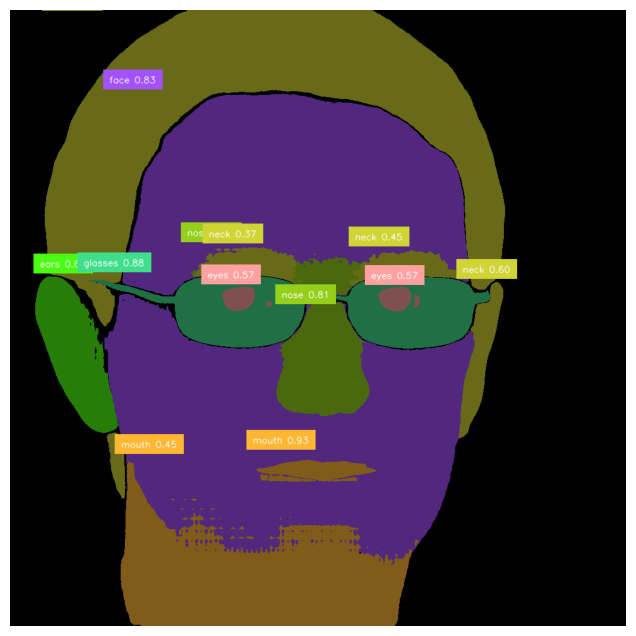

In [ ]:
combined_mask = np.zeros_like(image)
combined_labels = []

annotations = results

labels = [f"{CLASSES[class_id]} {confidence:0.2f}" for xyxy, mask, confidence, class_id, _, data in annotations]

annotated_frame = annotator.annotate(scene=np.zeros_like(image), detections=annotations)
annotated_frame = label_annotator.annotate(scene=annotated_frame, labels=labels, detections=annotations)

combined_mask += annotated_frame

combined_labels.extend(labels)

sv.plot_image(combined_mask, size=(8, 8))

In [ ]:
from PIL import Image

annotated_frame_pil = Image.fromarray(annotated_frame)
annotated_frame_pil.save("annotated_all_togather_image.jpg")

annotated_frame_pil = Image.fromarray(combined_mask)
annotated_frame_pil.save("annotated_all_togather_mask.jpg")


# Split (parallel)

### timer

In [ ]:
from datetime import datetime

start_time = datetime.now()

CLASSES = ['face', 'eyebrows', 'eyes', 'hair', 'mouth', 'neck']
IMAGE = '/content/git/lrp/images/fakes/easy_200_1110.jpg'
# IMAGE = "/content/pic2.jpg"
ALL_RESULTS = []

for i in range(len(CLASSES)):
  classes = [CLASSES[i]]
  print(classes)

  classes_dict = {CLASSES[i]:CLASSES[i]}

  SAMCLIP = ComposedDetectionModel(
      detection_model=GroundedSAM(
          CaptionOntology(classes_dict)
      ),
      classification_model=CLIP(
          CaptionOntology({k: k for k in classes})
      )
  )

  results = SAMCLIP.predict(IMAGE)
  ALL_RESULTS.append(results)

image = cv2.imread(IMAGE)

annotator = sv.MaskAnnotator()
label_annotator = sv.LabelAnnotator()

# for i in range(len(CLASSES)):
#   labels = [
#       f"{CLASSES[class_id]} {confidence:0.2f}"
#       for xyxy, mask, confidence, class_id, _, data in ALL_RESULTS[i]
#   ]

#   annotated_frame = annotator.annotate(
#       scene=image.copy(), detections=ALL_RESULTS[i]
#   )
#   annotated_frame = label_annotator.annotate(
#       scene=annotated_frame, labels=labels, detections=ALL_RESULTS[i]
#   )


combined_mask = np.zeros_like(image)
# combined_labels = []

for i in range(len(ALL_RESULTS)):
  print(CLASSES[i])
  annotations = ALL_RESULTS[i]
  result_class_id = ALL_RESULTS[i].class_id
  for j in range(len(result_class_id)):
    result_class_id[j] = i


  labels = [f"{CLASSES[class_id]} {confidence:0.2f}" for xyxy, mask, confidence, class_id, _, data in annotations]

  annotated_frame = annotator.annotate(scene=np.zeros_like(image), detections=annotations)
  annotated_frame = label_annotator.annotate(scene=annotated_frame, labels=labels, detections=annotations)

  combined_mask += annotated_frame

  # combined_labels.extend(labels)

# sv.plot_image(combined_mask, size=(8, 8))


from PIL import Image

annotated_frame_pil = Image.fromarray(combined_mask)
annotated_frame_pil.save("combined_split_mask.jpg")

end_time = datetime.now()
elapsed_time = end_time - start_time
print(f"Execution time: {elapsed_time}")

['face']
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased
['eyebrows']
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased
['eyes']
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased
['hair']
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased
['mouth']
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased
['neck']
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased
face
eyebrows
eyes
hair
mouth
neck
Execution time: 0:01:13.724931


### main

In [ ]:
CLASSES = ['face', 'eyebrows', 'eyes', 'hair', 'mouth', 'neck', 'ears', 'nose', 'glasses']


IMAGE = "/content/drive/MyDrive/gan_dataset/deepfake_0076.png"
ALL_RESULTS = []

for i in range(len(CLASSES)):
  classes = [CLASSES[i]]
  print(classes)

  classes_dict = {CLASSES[i]:CLASSES[i]}

  SAMCLIP = ComposedDetectionModel(
      detection_model=GroundedSAM(
          CaptionOntology(classes_dict)
      ),
      classification_model=CLIP(
          CaptionOntology({k: k for k in classes})
      )
  )

  results = SAMCLIP.predict(IMAGE)
  ALL_RESULTS.append(results)



['face']
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased
['eyebrows']
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased
['eyes']
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased
['hair']
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased
['mouth']
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased
['neck']
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased
['ears']
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased
['nose']
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased
['glasses']
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


In [ ]:
print(ALL_RESULTS)

[Detections(xyxy=array([[155.69504, 131.32266, 774.57336, 960.31995]], dtype=float32), mask=array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]]), confidence=array([0.8308414], dtype=float32), class_id=array([0]), tracker_id=None, data={}), Detections(xyxy=array([[563.0599 , 392.0804 , 727.5723 , 443.59732],
       [284.90082, 385.68018, 735.9094 , 448.148  ],
       [320.94843, 387.75934, 484.58197, 438.39362]], dtype=float32), mask=array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, Fa

In [ ]:
print(ALL_RESULTS[0])
print(ALL_RESULTS[1])

Detections(xyxy=array([[155.69504, 131.32266, 774.57336, 960.31995]], dtype=float32), mask=array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]]), confidence=array([0.8308414], dtype=float32), class_id=array([0]), tracker_id=None, data={})
Detections(xyxy=array([[563.0599 , 392.0804 , 727.5723 , 443.59732],
       [284.90082, 385.68018, 735.9094 , 448.148  ],
       [320.94843, 387.75934, 484.58197, 438.39362]], dtype=float32), mask=array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, Fals

### Show first-order masks

In [ ]:
image = cv2.imread(IMAGE)

annotator = sv.MaskAnnotator()
label_annotator = sv.LabelAnnotator()

for i in range(len(CLASSES)):
  # sc = np.zeros_like(image)

  labels = [
      f"{CLASSES[class_id]} {confidence:0.2f}"
      for xyxy, mask, confidence, class_id, _, data in ALL_RESULTS[i]
  ]

  MASK = annotator.annotate(scene=np.zeros_like(image), detections=ALL_RESULTS[i])

  # sc += annotated_frame
  # sv.plot_image(sc, size=(32, 32))
  Image.fromarray(MASK).save(f"/content/qwe/{CLASSES[i]}.jpg")


### Remove intersects

In [ ]:
import cv2
#
# FACE - ALL
#
def FACE_without_intersections():
  FACE = cv2.imread("/content/qwe/face.jpg", cv2.IMREAD_GRAYSCALE)

  for i in CLASSES:
    if i != 'face':
      instance = cv2.imread(f"/content/qwe/{i}.jpg", cv2.IMREAD_GRAYSCALE)
      intersection = cv2.bitwise_and(FACE, instance)
      FACE = cv2.bitwise_and(FACE, cv2.bitwise_not(intersection))
  return FACE


# def EYEBROWS_without_intersections():
#   EYEBROWS = cv2.imread("/content/qwe/eyebrows.jpg", cv2.IMREAD_GRAYSCALE)

#   instance = cv2.imread(f"/content/qwe/eyes.jpg", cv2.IMREAD_GRAYSCALE)
#   intersection = cv2.bitwise_and(EYEBROWS, instance)
#   EYEBROWS = cv2.bitwise_and(EYEBROWS, cv2.bitwise_not(instance))
#   return EYEBROWS


def EYES_without_intersections():
  EYES = cv2.imread("/content/qwe/eyes.jpg", cv2.IMREAD_GRAYSCALE)

  instance = cv2.imread(f"/content/qwe/nose.jpg", cv2.IMREAD_GRAYSCALE)
  intersection = cv2.bitwise_and(EYES, instance)
  EYES = cv2.bitwise_and(EYES, cv2.bitwise_not(instance))

  instance = cv2.imread(f"/content/qwe/eyebrows.jpg", cv2.IMREAD_GRAYSCALE)
  intersection = cv2.bitwise_and(EYES, instance)
  EYES = cv2.bitwise_and(EYES, cv2.bitwise_not(instance))
  return EYES


def NOSE_without_intersections():
  NOSE = cv2.imread("/content/qwe/nose.jpg", cv2.IMREAD_GRAYSCALE)

  instance = cv2.imread(f"/content/qwe/mouth.jpg", cv2.IMREAD_GRAYSCALE)
  intersection = cv2.bitwise_and(NOSE, instance)
  NOSE = cv2.bitwise_and(NOSE, cv2.bitwise_not(instance))

  instance = cv2.imread(f"/content/qwe/eyebrows.jpg", cv2.IMREAD_GRAYSCALE)
  intersection = cv2.bitwise_and(NOSE, instance)
  NOSE = cv2.bitwise_and(NOSE, cv2.bitwise_not(instance))
  return NOSE


def ALL_wihtout_intersection(CLASS):
  CLASS = cv2.imread(f"/content/qwe/{CLASS}.jpg", cv2.IMREAD_GRAYSCALE)
  return CLASS

for i in CLASSES:
  if i == 'face':
    FACE = FACE_without_intersections()
    Image.fromarray(FACE).save("/content/qwe/face_WI.jpg")
  elif i == 'eyes':
    EYES = EYES_without_intersections()
    Image.fromarray(EYES).save("/content/qwe/eyes_WI.jpg")
  # elif i == 'eyebrows':
  #   EYEBROWS = EYEBROWS_without_intersections()
  #   Image.fromarray(EYEBROWS).save("/content/qwe/eyebrows_WI.jpg")
  elif i == 'nose':
    NOSE = NOSE_without_intersections()
    Image.fromarray(NOSE).save("/content/qwe/nose_WI.jpg")
  else:
    CLASS = ALL_wihtout_intersection(i)
    Image.fromarray(CLASS).save(f"/content/qwe/{i}_WI.jpg")

# nos = NOSE_without_intersections()
# brov = EYEBROWS_without_intersections()

# qwe = nos + brov
# sv.plot_image(qwe, size=(32, 32))



In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

COLORS = [[255, 0, 0],
          [0, 255, 0],
          [0, 0, 255],
          [255, 255, 0],
          [0, 255, 255],
          [255, 0, 255],
          [255, 165, 0],
          [128, 0, 128],
          [165, 42, 42],
          [191, 255, 0]]

def paint(image_path, color):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    mask = np.any(image >= 50, axis=2)
    blacked = np.any(image < 50, axis=2)

    image[mask] = color
    image[blacked] = [0, 0, 0]

    return image

img = cv2.imread('/content/qwe/face_WI.jpg')

combined_mask = np.zeros_like(img)

for i in range(len(ALL_RESULTS)):
  print(CLASSES[i])
  path = f"/content/qwe/{CLASSES[i]}_WI.jpg"
  mask = cv2.imread(path)
  mask = paint(path, COLORS[i])
  # sv.plot_image(mask, size=(32, 32))

  combined_mask += mask

sv.plot_image(combined_mask, size=(32, 32))


In [ ]:
from PIL import Image

annotated_frame_pil = Image.fromarray(combined_mask)
annotated_frame_pil.save("combined_split_mask.jpg")


# Lrp

In [ ]:
!pip install gitpython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.2 MB/s eta 0:00:00


In [ ]:
import git
git.Repo.clone_from('https://github.com/pshakhmin/deepfakes.git', '/content/git')

<git.repo.base.Repo '/content/git/.git'>

## Helper functions

### lrp_layers.py

In [ ]:
"""Layers for layer-wise relevance propagation.

Layers for layer-wise relevance propagation can be modified.

"""
import torch
from torch import nn

class RelevancePropagationAdaptiveAvgPool2d(nn.Module):
    """Layer-wise relevance propagation for 2D adaptive average pooling.

    Attributes:
        layer: 2D adaptive average pooling layer.
        eps: A value added to the denominator for numerical stability.

    """

    def __init__(
            self,
            layer: torch.nn.AdaptiveAvgPool2d,
            eps: float = 1.0e-05,
            top_k: float = 0.0,
    ) -> None:
        super().__init__()
        self.layer = layer
        self.eps = eps
        self.top_k = top_k

    def forward(self, a: torch.tensor, r: torch.tensor) -> torch.tensor:
        if self.top_k:
            r = relevance_filter(r, top_k_percent=self.top_k)
        z = self.layer.forward(a) + self.eps
        s = (r / z).data
        (z * s).sum().backward()
        c = a.grad
        r = (a * c).data
        return r


class RelevancePropagationAvgPool2d(nn.Module):
    """Layer-wise relevance propagation for 2D average pooling.

    Attributes:
        layer: 2D average pooling layer.
        eps: A value added to the denominator for numerical stability.

    """

    def __init__(
            self, layer: torch.nn.AvgPool2d, eps: float = 1.0e-05, top_k: float = 0.0
    ) -> None:
        super().__init__()
        self.layer = layer
        self.eps = eps
        self.top_k = top_k

    def forward(self, a: torch.tensor, r: torch.tensor) -> torch.tensor:
        if self.top_k:
            r = relevance_filter(r, top_k_percent=self.top_k)
        z = self.layer.forward(a) + self.eps
        s = (r / z).data
        (z * s).sum().backward()
        c = a.grad
        r = (a * c).data
        return r


class RelevancePropagationMaxPool2d(nn.Module):
    """Layer-wise relevance propagation for 2D max pooling.

    Optionally substitutes max pooling by average pooling layers.

    Attributes:
        layer: 2D max pooling layer.
        eps: a value added to the denominator for numerical stability.

    """

    def __init__(
            self,
            layer: torch.nn.MaxPool2d,
            mode: str = "avg",
            eps: float = 1.0e-05,
            top_k: float = 0.0,
    ) -> None:
        super().__init__()

        if mode == "avg":
            self.layer = torch.nn.AvgPool2d(kernel_size=(2, 2))
        elif mode == "max":
            self.layer = layer

        self.eps = eps
        self.top_k = top_k

    def forward(self, a: torch.tensor, r: torch.tensor) -> torch.tensor:
        if self.top_k:
            r = relevance_filter(r, top_k_percent=self.top_k)
        z = self.layer.forward(a) + self.eps
        s = (r / z).data
        (z * s).sum().backward()
        c = a.grad
        r = (a * c).data
        return r


class RelevancePropagationConv2d(nn.Module):
    """Layer-wise relevance propagation for 2D convolution.

    Optionally modifies layer weights according to propagation rule. Here z^+-rule

    Attributes:
        layer: 2D convolutional layer.
        eps: a value added to the denominator for numerical stability.

    """

    def __init__(
            self,
            layer: torch.nn.Conv2d,
            mode: str = "z_plus",
            eps: float = 1.0e-05,
            top_k: float = 0.0,
    ) -> None:
        super().__init__()

        self.layer = layer

        if mode == "z_plus":
            self.layer.weight = torch.nn.Parameter(self.layer.weight.clamp(min=0.0))
            self.layer.bias = torch.nn.Parameter(torch.zeros_like(self.layer.bias))

        self.eps = eps
        self.top_k = top_k

    def forward(self, a: torch.tensor, r: torch.tensor) -> torch.tensor:
        if self.top_k:
            r = relevance_filter(r, top_k_percent=self.top_k)
        z = self.layer.forward(a) + self.eps
        s = (r / z).data
        (z * s).sum().backward()
        c = a.grad
        r = (a * c).data
        return r


class RelevancePropagationLinear(nn.Module):
    """Layer-wise relevance propagation for linear transformation.

    Optionally modifies layer weights according to propagation rule. Here z^+-rule

    Attributes:
        layer: linear transformation layer.
        eps: a value added to the denominator for numerical stability.

    """

    def __init__(
            self,
            layer: torch.nn.Linear,
            mode: str = "z_plus",
            eps: float = 1.0e-05,
            top_k: float = 0.0,
    ) -> None:
        super().__init__()

        self.layer = layer

        if mode == "z_plus":
            self.layer.weight = torch.nn.Parameter(self.layer.weight.clamp(min=0.0))
            self.layer.bias = torch.nn.Parameter(torch.zeros_like(self.layer.bias))

        self.eps = eps
        self.top_k = top_k

    @torch.no_grad()
    def forward(self, a: torch.tensor, r: torch.tensor) -> torch.tensor:
        if self.top_k:
            r = relevance_filter(r, top_k_percent=self.top_k)
        z = self.layer.forward(a) + self.eps
        s = r / z
        c = torch.mm(s, self.layer.weight)
        r = (a * c).data
        return r


class RelevancePropagationFlatten(nn.Module):
    """Layer-wise relevance propagation for flatten operation.

    Attributes:
        layer: flatten layer.

    """

    def __init__(self, layer: torch.nn.Flatten, top_k: float = 0.0) -> None:
        super().__init__()
        self.layer = layer

    @torch.no_grad()
    def forward(self, a: torch.tensor, r: torch.tensor) -> torch.tensor:
        r = r.view(size=a.shape)
        return r


class RelevancePropagationReLU(nn.Module):
    """Layer-wise relevance propagation for ReLU activation.

    Passes the relevance scores without modification. Might be of use later.

    """

    def __init__(self, layer: torch.nn.ReLU, top_k: float = 0.0) -> None:
        super().__init__()

    @torch.no_grad()
    def forward(self, a: torch.tensor, r: torch.tensor) -> torch.tensor:
        return r


class RelevancePropagationDropout(nn.Module):
    """Layer-wise relevance propagation for dropout layer.

    Passes the relevance scores without modification. Might be of use later.

    """

    def __init__(self, layer: torch.nn.Dropout, top_k: float = 0.0) -> None:
        super().__init__()

    @torch.no_grad()
    def forward(self, a: torch.tensor, r: torch.tensor) -> torch.tensor:
        return r


class RelevancePropagationIdentity(nn.Module):
    """Identity layer for relevance propagation.

    Passes relevance scores without modifying them.

    """

    def __init__(self, layer: nn.Module, top_k: float = 0.0) -> None:
        super().__init__()

    @torch.no_grad()
    def forward(self, a: torch.tensor, r: torch.tensor) -> torch.tensor:
        return r

def relevance_filter(r: torch.tensor, top_k_percent: float = 1.0) -> torch.tensor:
    """Filter that allows largest k percent values to pass for each batch dimension.

    Filter keeps k% of the largest tensor elements. Other tensor elements are set to
    zero. Here, k = 1 means that all relevance scores are passed on to the next layer.

    Args:
        r: Tensor holding relevance scores of current layer.
        top_k_percent: Proportion of top k values that is passed on.

    Returns:
        Tensor of same shape as input tensor.

    """
    assert 0.0 < top_k_percent <= 1.0

    if top_k_percent < 1.0:
        size = r.size()
        r = r.flatten(start_dim=1)
        num_elements = r.size(-1)
        k = max(1, int(top_k_percent * num_elements))
        top_k = torch.topk(input=r, k=k, dim=-1)
        r = torch.zeros_like(r)
        r.scatter_(dim=1, index=top_k.indices, src=top_k.values)
        return r.view(size)
    else:
        return r

### model_lrp.py

In [ ]:
from torch import cuda
import torch
from torch import nn
from torchvision import transforms, models
import torchvision
from copy import deepcopy
# from lrp_layers import *

class LRPModel(nn.Module):
    """Class wraps PyTorch model to perform layer-wise relevance propagation."""

    def __init__(self, model: torch.nn.Module, top_k: float = 0.0) -> None:
        super().__init__()
        self.model = model
        self.top_k = top_k

        self.model.eval()  # self.model.train() activates dropout / batch normalization etc.!

        # Parse network
        self.layers = self._get_layer_operations()

        # Create LRP network
        self.lrp_layers = self._create_lrp_model()

    def _create_lrp_model(self) -> torch.nn.ModuleList:
        """Method builds the model for layer-wise relevance propagation.

        Returns:
            LRP-model as module list.

        """
        # Clone layers from original model. This is necessary as we might modify the weights.
        layers = deepcopy(self.layers)
        lookup_table = layers_lookup()

        # Run backwards through layers
        for i, layer in enumerate(layers[::-1]):
            try:
                layers[i] = lookup_table[layer.__class__](layer=layer, top_k=self.top_k)
            except KeyError:
                message = (
                    f"Layer-wise relevance propagation not implemented for "
                    f"{layer.__class__.__name__} layer."
                )
                raise NotImplementedError(message)

        return layers

    def _get_layer_operations(self) -> torch.nn.ModuleList:
        """Get all network operations and store them in a list.

        This method is adapted to VGG networks from PyTorch's Model Zoo.
        Modify this method to work also for other networks.

        Returns:
            Layers of original model stored in module list.

        """
        layers = torch.nn.ModuleList()

        # Parse VGG-16
        for layer in self.model.features:
            layers.append(layer)

        layers.append(self.model.avgpool)
        layers.append(torch.nn.Flatten(start_dim=1))

        for layer in self.model.classifier:
            layers.append(layer)

        return layers

    def forward(self, x: torch.tensor) -> torch.tensor:
        """Forward method that first performs standard inference followed by layer-wise relevance propagation.

        Args:
            x: Input tensor representing an image / images (N, C, H, W).

        Returns:
            Tensor holding relevance scores with dimensions (N, 1, H, W).

        """
        activations = list()

        # Run inference and collect activations.
        with torch.no_grad():
            # Replace image with ones avoids using image information for relevance computation.
            activations.append(torch.ones_like(x))
            for layer in self.layers:
                x = layer.forward(x)
                activations.append(x)

        # Reverse order of activations to run backwards through model
        activations = activations[::-1]
        activations = [a.data.requires_grad_(True) for a in activations]

        # Initial relevance scores are the network's output activations
        relevance = torch.softmax(activations.pop(0), dim=-1)  # Unsupervised

        # Perform relevance propagation
        for i, layer in enumerate(self.lrp_layers):
            relevance = layer.forward(activations.pop(0), relevance)

        return relevance.permute(0, 2, 3, 1).sum(dim=-1).squeeze().detach().cpu()

def layers_lookup() -> dict:
    """Lookup table to map network layer to associated LRP operation.

    Returns:
        Dictionary holding class mappings.
    """
    lookup_table = {
        torch.nn.modules.linear.Linear: RelevancePropagationLinear,
        torch.nn.modules.conv.Conv2d: RelevancePropagationConv2d,
        torch.nn.modules.activation.ReLU: RelevancePropagationReLU,
        torch.nn.modules.dropout.Dropout: RelevancePropagationDropout,
        torch.nn.modules.flatten.Flatten: RelevancePropagationFlatten,
        torch.nn.modules.pooling.AvgPool2d: RelevancePropagationAvgPool2d,
        torch.nn.modules.pooling.MaxPool2d: RelevancePropagationMaxPool2d,
        torch.nn.modules.pooling.AdaptiveAvgPool2d: RelevancePropagationAdaptiveAvgPool2d,
    }
    return lookup_table

### visualise.py

In [ ]:
"""Script with plot method for visualization of relevance scores.
"""
import argparse
import matplotlib.pyplot as plt
import torch
import os


def plot_relevance_scores(
        x: torch.tensor, r: torch.tensor, name: str, config: argparse.Namespace = None
) -> None:
    """Plots results from layer-wise relevance propagation next to original image.

    Method currently accepts only a batch size of one.

    Args:
        x: Original image.
        r: Relevance scores for original image.
        name: Image name.
        config: Argparse namespace object.

    """
    #output_dir = config.output_dir
    output_dir = "/Users/danielbelikov/DataspellProjects/lrp/lrp_images"

    max_fig_size = 20

    _, _, img_height, img_width = x.shape
    max_dim = max(img_height, img_width)
    fig_height, fig_width = (
        max_fig_size * img_height / max_dim,
        max_fig_size * img_width / max_dim,
    )

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(fig_width, fig_height))

    x = x[0].squeeze().permute(1, 2, 0).detach().cpu()
    x_min = x.min()
    x_max = x.max()
    x = (x - x_min) / (x_max - x_min)
    axes[0].imshow(x)
    axes[0].set_axis_off()

    r_min = r.min()
    r_max = r.max()
    r = (r - r_min) / (r_max - r_min)
    axes[1].imshow(r, cmap="afmhot")
    axes[1].set_axis_off()

    fig.tight_layout()
    lrpImages_folder = os.getcwd() + '/git/lrp/lrp_images'
    plt.savefig(f"{lrpImages_folder}/image_{name}.png", bbox_inches="tight")
    plt.close(fig)

#%%

## main

In [ ]:
import argparse
import matplotlib.pyplot as plt
import torch
import os


def plot_relevance_scores(
        x: torch.tensor, r: torch.tensor, name: str, config: argparse.Namespace = None
) -> None:

    max_fig_size = 50

    _, _, img_height, img_width = x.shape
    max_dim = max(img_height, img_width)
    fig_height, fig_width = (
        max_fig_size * img_height / max_dim,
        max_fig_size * img_width / max_dim,
    )

    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(fig_width, fig_height))

    r_min = r.min()
    r_max = r.max()
    r = (r - r_min) / (r_max - r_min)
    axes.imshow(r, cmap="afmhot")
    axes.set_axis_off()

    fig.tight_layout()
    lrpImages_folder = os.getcwd() + '/git/lrp/lrp_images'
    plt.savefig(f"{lrpImages_folder}/image_{name}.jpg", bbox_inches="tight")
    plt.close(fig)


In [ ]:
from torch import cuda
import torch
from torch import nn
from torchvision import transforms, models
import torchvision
from torchvision.models import vgg16, VGG16_Weights
import os



if __name__ == '__main__':

    if cuda.is_available:
        device = torch.device("cuda")
    else:
        device = torch.device("cpu")

    print(f"Using: {device}\n")

    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]

    transform = transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(mean, std),
    ])

    dataset_folder = os.getcwd() + '/git/lrp/images'
    dataset = torchvision.datasets.ImageFolder(root=dataset_folder, transform=transform)

    data_loader = torch.utils.data.DataLoader(dataset, batch_size=1)

    model = models.efficientnet_b1(pretrained = True)

    model.classifier[1] = nn.Sequential(
        nn.Linear(1280, 1),
        nn.Sigmoid()
    )
    model_path = os.getcwd() + '/git/lrp/models/effnet_0.88.pth'
    model.load_state_dict(torch.load(model_path, map_location=device))
    model = models.vgg16(weights=VGG16_Weights.DEFAULT)
    model.to(device)

    lrp_model = LRPModel(model=model)

    for i, (x, y) in enumerate(data_loader):
        x = x.to(device)
        r = lrp_model.forward(x)
        print(f"Image {i} was read")
        plot_relevance_scores(x=x, r=r, name=str(i))


# merging

In [ ]:
import cv2
import supervision as sv


IMAGE_MASK = '/content/combined_split_mask.jpg'
image_mask = cv2.imread(IMAGE_MASK)

qwe = np.zeros_like(image_mask)

asd = cv2.imread('/content/combined_split_mask.jpg')
zxc = cv2.imread('/content/git/lrp/lrp_images/image_0.jpg')
zxc = cv2.resize(zxc, (asd.shape[1], asd.shape[0]))

qwe += asd
qwe += zxc

sv.plot_image(qwe, size=(8, 8))

saveve = Image.fromarray(qwe)
saveve.save("combined_lrp+mask.jpg")

In [ ]:
image = cv2.imread(IMAGE)
IMAGE_LRP = '/content/git/lrp/lrp_images/image_0.jpg'
img_lrp = cv2.imread(IMAGE_LRP)
img_lrp = cv2.resize(img_lrp, (image.shape[1], image.shape[0]))

annotator = sv.MaskAnnotator()
label_annotator = sv.LabelAnnotator()

sc = np.zeros_like(image)

PIXEL_COUNT = []
PIXEL_COUNT_TEXT = []

for i in range(len(CLASSES)):
  path = f'/content/qwe/{CLASSES[i]}_WI.jpg'
  sc = cv2.imread(path)
  Image.fromarray(sc).save(f"/content/combined/seg/{CLASSES[i]}.jpg")

  mask_lrp_classwise = cv2.bitwise_and(sc, img_lrp)
  Image.fromarray(mask_lrp_classwise).save(f"/content/combined/seg_lrp/{CLASSES[i]}.jpg")

  non_zero_pixels = np.count_nonzero(mask_lrp_classwise)

  text = f"Number of pixels in {CLASSES[i]}: {non_zero_pixels}"
  PIXEL_COUNT.append(non_zero_pixels)
  PIXEL_COUNT_TEXT.append(text)

print(PIXEL_COUNT)
print(PIXEL_COUNT_TEXT)


[153791, 15294, 10491, 125160, 7227, 21628, 16900, 22934]
['Number of pixels in face: 153791', 'Number of pixels in eyebrows: 15294', 'Number of pixels in eyes: 10491', 'Number of pixels in hair: 125160', 'Number of pixels in mouth: 7227', 'Number of pixels in neck: 21628', 'Number of pixels in ears: 16900', 'Number of pixels in nose: 22934']


In [ ]:
def extract_number(s):
    return int(s.split(': ')[1])

sorted_pixel_count_text = sorted(PIXEL_COUNT_TEXT, key=extract_number, reverse=True)
sorted_pixel_count = sorted(PIXEL_COUNT, reverse=True)

PERCENTAGES = []
SUM = sum(PIXEL_COUNT)

for i in sorted_pixel_count_text:
  j = i.split()
  classname = j[4].replace(':', '')
  percentage = int(j[5]) * 100 / SUM
  PERCENTAGES.append(f'{classname} {percentage:.2f}')
  print(f'class {classname} contains {percentage:.2f}%')

print(PERCENTAGES)
print(sorted_pixel_count)

class face contains 41.18%
class hair contains 33.52%
class nose contains 6.14%
class neck contains 5.79%
class ears contains 4.53%
class eyebrows contains 4.10%
class eyes contains 2.81%
class mouth contains 1.94%
['face 41.18', 'hair 33.52', 'nose 6.14', 'neck 5.79', 'ears 4.53', 'eyebrows 4.10', 'eyes 2.81', 'mouth 1.94']
[153791, 125160, 22934, 21628, 16900, 15294, 10491, 7227]


---



# **`THE MERGE`**

---

---




## **STEPS**

## *   Environment setup
## *   Segmentation
## *   LRP
## *   Merge







---


## **Environment Setup**

In [ ]:
import subprocess
import pkg_resources
from tqdm.notebook import tqdm
import locale
locale.getpreferredencoding = lambda: "UTF-8"

def is_installed(package):
    """
    Check if a package is already installed.

    :param package: str, the name of the package to check.
    :return: bool, True if installed, False otherwise.
    """
    try:
        pkg_resources.get_distribution(package)
        return True
    except pkg_resources.DistributionNotFound:
        return False

packages = [
    "autodistill",
    "autodistill_clip",
    "autodistill_grounded_sam",
    "supervision",
    "opencv-python",
    "roboflow",
    "ultralytics",
    "gitpython"
]

for package in tqdm(packages, desc="Checking and installing packages"):
    if is_installed(package):
        print(f"{package} is already installed.")
    else:
        try:
            result = subprocess.run(
                f"pip install {package}",
                shell=True,
                stdout=subprocess.PIPE,
                stderr=subprocess.PIPE,
                text=True
            )

            if result.returncode != 0:
                print(f"Error installing {package}: {result.stderr}")
            else:
                print(f"Installed {package} successfully")
        except Exception as e:
            print(f"An exception occurred while trying to install {package}: {str(e)}")

Checking and installing packages:   0%|          | 0/8 [00:00<?, ?it/s]

FileNotFoundError: [Errno 2] No such file or directory: '/usr/local/lib/python3.10/dist-packages/opencv_python_headless-4.9.0.80.dist-info/METADATA'

In [ ]:
!pip install gitpython
from autodistill.core.composed_detection_model import ComposedDetectionModel
from autodistill.detection import CaptionOntology
from autodistill_clip import CLIP
from autodistill_grounded_sam import GroundedSAM
import contextlib
import cv2
import git
from google.colab import drive
import io
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import shutil
import supervision as sv
from tqdm.notebook import tqdm
import torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.2 MB/s eta 0:00:00




---


## **Segmentation**

In [ ]:
class SEGMENTATION:
    HOME = os.getcwd()
    WORK_DIR = f'{HOME}/segmentation'
    os.makedirs(WORK_DIR, exist_ok=True)
    SPLIT_MASK_DIR = f'{WORK_DIR}/split_masks'
    os.makedirs(SPLIT_MASK_DIR, exist_ok=True)
    COMBINED_MASK_DIR = f'{WORK_DIR}/combined_masks'
    os.makedirs(COMBINED_MASK_DIR, exist_ok=True)

    CLASSES = ['face', 'eyebrows', 'eyes', 'hair', 'mouth', 'neck', 'ears', 'nose', 'glasses']

    COLORS = [[255, 0, 0],
              [0, 255, 0],
              [0, 0, 255],
              [255, 255, 0],
              [0, 255, 255],
              [255, 0, 255],
              [255, 165, 0],
              [128, 0, 128],
              [165, 42, 42],
              [191, 255, 0]]

    def __init__(self, image_path, COUNTER):
        self.image_path = image_path
        self.COUNTER = COUNTER

    def segment_image(self):
        all_results = []
        image = cv2.imread(self.image_path)

        for i, class_name in enumerate(self.CLASSES):
            classes_dict = {class_name: class_name}
            MODEL = ComposedDetectionModel(
                detection_model=GroundedSAM(
                    CaptionOntology(classes_dict)
                ),
                classification_model=CLIP(
                    CaptionOntology({class_name: class_name})
                )
            )

            results = MODEL.predict(self.image_path)
            all_results.append(results)

            annotator = sv.MaskAnnotator()
            mask = annotator.annotate(scene=np.zeros_like(image), detections=results)
            Image.fromarray(mask).save(f"{self.SPLIT_MASK_DIR}/{class_name}.jpg")

        for i in self.CLASSES:
            if i == 'face':
                FACE = self.FACE_without_intersections()
                Image.fromarray(FACE).save(f"{self.SPLIT_MASK_DIR}/face_WI.jpg")
            elif i == 'eyes':
                EYES = self.EYES_without_intersections()
                Image.fromarray(EYES).save(f"{self.SPLIT_MASK_DIR}/eyes_WI.jpg")
            elif i == 'nose':
                NOSE = self.NOSE_without_intersections()
                Image.fromarray(NOSE).save(f"{self.SPLIT_MASK_DIR}/nose_WI.jpg")
            elif i == 'glasses':
                GLASSES = self.GLASSES_without_intersections()
                Image.fromarray(GLASSES).save(f"{self.SPLIT_MASK_DIR}/glasses_WI.jpg")
            elif i == 'hair':
                HAIR = self.HAIR_without_intersections()
                Image.fromarray(HAIR).save(f"{self.SPLIT_MASK_DIR}/hair_WI.jpg")
            else:
                CLASS = self.ALL_without_intersection(i)
                Image.fromarray(CLASS).save(f"{self.SPLIT_MASK_DIR}/{i}_WI.jpg")

    def FACE_without_intersections(self):
        FACE = cv2.imread(f"{self.SPLIT_MASK_DIR}/face.jpg", cv2.IMREAD_GRAYSCALE)

        for i in self.CLASSES:
            if i != 'face' and i != 'hair':
                instance = cv2.imread(f"{self.SPLIT_MASK_DIR}/{i}.jpg", cv2.IMREAD_GRAYSCALE)
                intersection = cv2.bitwise_and(FACE, instance)
                FACE = cv2.bitwise_and(FACE, cv2.bitwise_not(intersection))
        return FACE

    def HAIR_without_intersections(self):
        HAIR = cv2.imread(f"{self.SPLIT_MASK_DIR}/hair.jpg", cv2.IMREAD_GRAYSCALE)

        # INSTANES = ['fece', 'neck', 'ears']
        # for instance in instances:

        instance = cv2.imread(f"{self.SPLIT_MASK_DIR}/face.jpg", cv2.IMREAD_GRAYSCALE)
        intersection = cv2.bitwise_and(HAIR, instance)
        HAIR = cv2.bitwise_and(HAIR, cv2.bitwise_not(intersection))

        instance = cv2.imread(f"{self.SPLIT_MASK_DIR}/neck.jpg", cv2.IMREAD_GRAYSCALE)
        intersection = cv2.bitwise_and(HAIR, instance)
        HAIR = cv2.bitwise_and(HAIR, cv2.bitwise_not(intersection))

        instance = cv2.imread(f"{self.SPLIT_MASK_DIR}/ears.jpg", cv2.IMREAD_GRAYSCALE)
        intersection = cv2.bitwise_and(HAIR, instance)
        HAIR = cv2.bitwise_and(HAIR, cv2.bitwise_not(intersection))
        return HAIR

    def EYES_without_intersections(self):
        EYES = cv2.imread(f"{self.SPLIT_MASK_DIR}/eyes.jpg", cv2.IMREAD_GRAYSCALE)

        instance = cv2.imread(f"{self.SPLIT_MASK_DIR}/nose.jpg", cv2.IMREAD_GRAYSCALE)
        intersection = cv2.bitwise_and(EYES, instance)
        EYES = cv2.bitwise_and(EYES, cv2.bitwise_not(intersection))

        instance = cv2.imread(f"{self.SPLIT_MASK_DIR}/eyebrows.jpg", cv2.IMREAD_GRAYSCALE)
        intersection = cv2.bitwise_and(EYES, instance)
        EYES = cv2.bitwise_and(EYES, cv2.bitwise_not(intersection))
        return EYES

    def GLASSES_without_intersections(self):
        GLASSES = cv2.imread(f"{self.SPLIT_MASK_DIR}/glasses.jpg", cv2.IMREAD_GRAYSCALE)

        instance = cv2.imread(f"{self.SPLIT_MASK_DIR}/eyes.jpg", cv2.IMREAD_GRAYSCALE)
        intersection = cv2.bitwise_and(GLASSES, instance)
        GLASSES = cv2.bitwise_and(GLASSES, cv2.bitwise_not(intersection))

        instance = cv2.imread(f"{self.SPLIT_MASK_DIR}/eyebrows.jpg", cv2.IMREAD_GRAYSCALE)
        intersection = cv2.bitwise_and(GLASSES, instance)
        GLASSES = cv2.bitwise_and(GLASSES, cv2.bitwise_not(intersection))

        instance = cv2.imread(f"{self.SPLIT_MASK_DIR}/nose.jpg", cv2.IMREAD_GRAYSCALE)
        intersection = cv2.bitwise_and(GLASSES, instance)
        GLASSES = cv2.bitwise_and(GLASSES, cv2.bitwise_not(intersection))
        return GLASSES

    def NOSE_without_intersections(self):
        NOSE = cv2.imread(f"{self.SPLIT_MASK_DIR}/nose.jpg", cv2.IMREAD_GRAYSCALE)

        instance = cv2.imread(f"{self.SPLIT_MASK_DIR}/mouth.jpg", cv2.IMREAD_GRAYSCALE)
        intersection = cv2.bitwise_and(NOSE, instance)
        NOSE = cv2.bitwise_and(NOSE, cv2.bitwise_not(intersection))

        instance = cv2.imread(f"{self.SPLIT_MASK_DIR}/eyebrows.jpg", cv2.IMREAD_GRAYSCALE)
        intersection = cv2.bitwise_and(NOSE, instance)
        NOSE = cv2.bitwise_and(NOSE, cv2.bitwise_not(intersection))
        return NOSE

    def ALL_without_intersection(self, CLASS):
        CLASS = cv2.imread(f"{self.SPLIT_MASK_DIR}/{CLASS}.jpg", cv2.IMREAD_GRAYSCALE)
        return CLASS

    @staticmethod
    def paint(image_path, color):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)

        mask = np.any(image >= 50, axis=2)
        blacked = np.any(image < 50, axis=2)

        image[mask] = color
        image[blacked] = [0, 0, 0]

        return image

    def save_mask(self):
        img = cv2.imread(f'{self.SPLIT_MASK_DIR}/face_WI.jpg')
        combined_mask = np.zeros_like(img)

        for i in range(len(self.CLASSES)):
            path = f"{self.SPLIT_MASK_DIR}/{self.CLASSES[i]}_WI.jpg"
            mask = self.paint(path, self.COLORS[i])
            combined_mask += mask

        annotated_frame_pil = Image.fromarray(combined_mask)
        annotated_frame_pil.save(f"{self.COMBINED_MASK_DIR}/{self.COUNTER}.jpg")


In [ ]:
# image_path = '/content/lrp/fake/deepfake_0009.png'

# S = SEGMENTATION(image_path, 9)
# S.segment_image()
# S.save_mask()

trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


The `device` argument is deprecated and will be removed in v5 of Transformers.
torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
None of the inputs have requires_grad=True. Gradients will be None


trying to load grounding dino directly
final text_encoder_type: bert-base-uncased
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


In [ ]:
# from datetime import datetime

# start_time = datetime.now()

# qwe = ['fakes', 'real']

# for j in range(2):
#   image_directory = f'/content/git/lrp/images/{qwe[j]}'
#   files = os.listdir(image_directory)
#   for i in tqdm(range(len(files)), desc="Processing Images"):
#       with contextlib.redirect_stdout(io.StringIO()), contextlib.redirect_stderr(io.StringIO()):
#           file_path = os.path.join(image_directory, files[i])
#           if file_path != f'/content/git/lrp/images/{qwe[j]}/.DS_Store':
#             S = SEGMENTATION(file_path, (i + 1) * (j + 1))
#             S.segment_image()
#             S.save_mask()

# end_time = datetime.now()
# elapsed_time = end_time - start_time
# print(f"Execution time: {elapsed_time}")



---


## **LRP**

In [ ]:
import git
git.Repo.clone_from('https://github.com/pshakhmin/deepfakes.git', '/content/git')

<git.repo.base.Repo '/content/git/.git'>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Новый раздел

In [ ]:
"""Layers for layer-wise relevance propagation.

Layers for layer-wise relevance propagation can be modified.

"""
import torch
from torch import nn

class RelevancePropagationAdaptiveAvgPool2d(nn.Module):
    """Layer-wise relevance propagation for 2D adaptive average pooling.

    Attributes:
        layer: 2D adaptive average pooling layer.
        eps: A value added to the denominator for numerical stability.

    """

    def __init__(
            self,
            layer: torch.nn.AdaptiveAvgPool2d,
            eps: float = 1.0e-05,
            top_k: float = 0.0,
    ) -> None:
        super().__init__()
        self.layer = layer
        self.eps = eps
        self.top_k = top_k

    def forward(self, a: torch.tensor, r: torch.tensor) -> torch.tensor:
        if self.top_k:
            r = relevance_filter(r, top_k_percent=self.top_k)
        z = self.layer.forward(a) + self.eps
        s = (r / z).data
        (z * s).sum().backward()
        c = a.grad
        r = (a * c).data
        return r


class RelevancePropagationAvgPool2d(nn.Module):
    """Layer-wise relevance propagation for 2D average pooling.

    Attributes:
        layer: 2D average pooling layer.
        eps: A value added to the denominator for numerical stability.

    """

    def __init__(
            self, layer: torch.nn.AvgPool2d, eps: float = 1.0e-05, top_k: float = 0.0
    ) -> None:
        super().__init__()
        self.layer = layer
        self.eps = eps
        self.top_k = top_k

    def forward(self, a: torch.tensor, r: torch.tensor) -> torch.tensor:
        if self.top_k:
            r = relevance_filter(r, top_k_percent=self.top_k)
        z = self.layer.forward(a) + self.eps
        s = (r / z).data
        (z * s).sum().backward()
        c = a.grad
        r = (a * c).data
        return r


class RelevancePropagationMaxPool2d(nn.Module):
    """Layer-wise relevance propagation for 2D max pooling.

    Optionally substitutes max pooling by average pooling layers.

    Attributes:
        layer: 2D max pooling layer.
        eps: a value added to the denominator for numerical stability.

    """

    def __init__(
            self,
            layer: torch.nn.MaxPool2d,
            mode: str = "avg",
            eps: float = 1.0e-05,
            top_k: float = 0.0,
    ) -> None:
        super().__init__()

        if mode == "avg":
            self.layer = torch.nn.AvgPool2d(kernel_size=(2, 2))
        elif mode == "max":
            self.layer = layer

        self.eps = eps
        self.top_k = top_k

    def forward(self, a: torch.tensor, r: torch.tensor) -> torch.tensor:
        if self.top_k:
            r = relevance_filter(r, top_k_percent=self.top_k)
        z = self.layer.forward(a) + self.eps
        s = (r / z).data
        (z * s).sum().backward()
        c = a.grad
        r = (a * c).data
        return r


class RelevancePropagationConv2d(nn.Module):
    """Layer-wise relevance propagation for 2D convolution.

    Optionally modifies layer weights according to propagation rule. Here z^+-rule

    Attributes:
        layer: 2D convolutional layer.
        eps: a value added to the denominator for numerical stability.

    """

    def __init__(
            self,
            layer: torch.nn.Conv2d,
            mode: str = "z_plus",
            eps: float = 1.0e-05,
            top_k: float = 0.0,
    ) -> None:
        super().__init__()

        self.layer = layer

        if mode == "z_plus":
            self.layer.weight = torch.nn.Parameter(self.layer.weight.clamp(min=0.0))
            self.layer.bias = torch.nn.Parameter(torch.zeros_like(self.layer.bias))

        self.eps = eps
        self.top_k = top_k

    def forward(self, a: torch.tensor, r: torch.tensor) -> torch.tensor:
        if self.top_k:
            r = relevance_filter(r, top_k_percent=self.top_k)
        z = self.layer.forward(a) + self.eps
        s = (r / z).data
        (z * s).sum().backward()
        c = a.grad
        r = (a * c).data
        return r


class RelevancePropagationLinear(nn.Module):
    """Layer-wise relevance propagation for linear transformation.

    Optionally modifies layer weights according to propagation rule. Here z^+-rule

    Attributes:
        layer: linear transformation layer.
        eps: a value added to the denominator for numerical stability.

    """

    def __init__(
            self,
            layer: torch.nn.Linear,
            mode: str = "z_plus",
            eps: float = 1.0e-05,
            top_k: float = 0.0,
    ) -> None:
        super().__init__()

        self.layer = layer

        if mode == "z_plus":
            self.layer.weight = torch.nn.Parameter(self.layer.weight.clamp(min=0.0))
            self.layer.bias = torch.nn.Parameter(torch.zeros_like(self.layer.bias))

        self.eps = eps
        self.top_k = top_k

    @torch.no_grad()
    def forward(self, a: torch.tensor, r: torch.tensor) -> torch.tensor:
        if self.top_k:
            r = relevance_filter(r, top_k_percent=self.top_k)
        z = self.layer.forward(a) + self.eps
        s = r / z
        c = torch.mm(s, self.layer.weight)
        r = (a * c).data
        return r


class RelevancePropagationFlatten(nn.Module):
    """Layer-wise relevance propagation for flatten operation.

    Attributes:
        layer: flatten layer.

    """

    def __init__(self, layer: torch.nn.Flatten, top_k: float = 0.0) -> None:
        super().__init__()
        self.layer = layer

    @torch.no_grad()
    def forward(self, a: torch.tensor, r: torch.tensor) -> torch.tensor:
        r = r.view(size=a.shape)
        return r


class RelevancePropagationReLU(nn.Module):
    """Layer-wise relevance propagation for ReLU activation.

    Passes the relevance scores without modification. Might be of use later.

    """

    def __init__(self, layer: torch.nn.ReLU, top_k: float = 0.0) -> None:
        super().__init__()

    @torch.no_grad()
    def forward(self, a: torch.tensor, r: torch.tensor) -> torch.tensor:
        return r


class RelevancePropagationDropout(nn.Module):
    """Layer-wise relevance propagation for dropout layer.

    Passes the relevance scores without modification. Might be of use later.

    """

    def __init__(self, layer: torch.nn.Dropout, top_k: float = 0.0) -> None:
        super().__init__()

    @torch.no_grad()
    def forward(self, a: torch.tensor, r: torch.tensor) -> torch.tensor:
        return r


class RelevancePropagationIdentity(nn.Module):
    """Identity layer for relevance propagation.

    Passes relevance scores without modifying them.

    """

    def __init__(self, layer: nn.Module, top_k: float = 0.0) -> None:
        super().__init__()

    @torch.no_grad()
    def forward(self, a: torch.tensor, r: torch.tensor) -> torch.tensor:
        return r

def relevance_filter(r: torch.tensor, top_k_percent: float = 1.0) -> torch.tensor:
    """Filter that allows largest k percent values to pass for each batch dimension.

    Filter keeps k% of the largest tensor elements. Other tensor elements are set to
    zero. Here, k = 1 means that all relevance scores are passed on to the next layer.

    Args:
        r: Tensor holding relevance scores of current layer.
        top_k_percent: Proportion of top k values that is passed on.

    Returns:
        Tensor of same shape as input tensor.

    """
    assert 0.0 < top_k_percent <= 1.0

    if top_k_percent < 1.0:
        size = r.size()
        r = r.flatten(start_dim=1)
        num_elements = r.size(-1)
        k = max(1, int(top_k_percent * num_elements))
        top_k = torch.topk(input=r, k=k, dim=-1)
        r = torch.zeros_like(r)
        r.scatter_(dim=1, index=top_k.indices, src=top_k.values)
        return r.view(size)
    else:
        return r

In [ ]:
from torch import cuda
import torch
from torch import nn
from torchvision import transforms, models
import torchvision
from copy import deepcopy
# from lrp_layers import *

class LRPModel(nn.Module):
    """Class wraps PyTorch model to perform layer-wise relevance propagation."""

    def __init__(self, model: torch.nn.Module, top_k: float = 0.0) -> None:
        super().__init__()
        self.model = model
        self.top_k = top_k

        self.model.eval()  # self.model.train() activates dropout / batch normalization etc.!

        # Parse network
        self.layers = self._get_layer_operations()

        # Create LRP network
        self.lrp_layers = self._create_lrp_model()

    def _create_lrp_model(self) -> torch.nn.ModuleList:
        """Method builds the model for layer-wise relevance propagation.

        Returns:
            LRP-model as module list.

        """
        # Clone layers from original model. This is necessary as we might modify the weights.
        layers = deepcopy(self.layers)
        lookup_table = layers_lookup()

        # Run backwards through layers
        for i, layer in enumerate(layers[::-1]):
            try:
                layers[i] = lookup_table[layer.__class__](layer=layer, top_k=self.top_k)
            except KeyError:
                message = (
                    f"Layer-wise relevance propagation not implemented for "
                    f"{layer.__class__.__name__} layer."
                )
                raise NotImplementedError(message)

        return layers

    def _get_layer_operations(self) -> torch.nn.ModuleList:
        """Get all network operations and store them in a list.

        This method is adapted to VGG networks from PyTorch's Model Zoo.
        Modify this method to work also for other networks.

        Returns:
            Layers of original model stored in module list.

        """
        layers = torch.nn.ModuleList()

        # Parse VGG-16
        for layer in self.model.features:
            layers.append(layer)

        layers.append(self.model.avgpool)
        layers.append(torch.nn.Flatten(start_dim=1))

        for layer in self.model.classifier:
            layers.append(layer)

        return layers

    def forward(self, x: torch.tensor) -> torch.tensor:
        """Forward method that first performs standard inference followed by layer-wise relevance propagation.

        Args:
            x: Input tensor representing an image / images (N, C, H, W).

        Returns:
            Tensor holding relevance scores with dimensions (N, 1, H, W).

        """
        activations = list()

        # Run inference and collect activations.
        with torch.no_grad():
            # Replace image with ones avoids using image information for relevance computation.
            activations.append(torch.ones_like(x))
            for layer in self.layers:
                x = layer.forward(x)
                activations.append(x)

        # Reverse order of activations to run backwards through model
        activations = activations[::-1]
        activations = [a.data.requires_grad_(True) for a in activations]

        # Initial relevance scores are the network's output activations
        relevance = torch.softmax(activations.pop(0), dim=-1)  # Unsupervised

        # Perform relevance propagation
        for i, layer in enumerate(self.lrp_layers):
            relevance = layer.forward(activations.pop(0), relevance)

        return relevance.permute(0, 2, 3, 1).sum(dim=-1).squeeze().detach().cpu()

def layers_lookup() -> dict:
    """Lookup table to map network layer to associated LRP operation.

    Returns:
        Dictionary holding class mappings.
    """
    lookup_table = {
        torch.nn.modules.linear.Linear: RelevancePropagationLinear,
        torch.nn.modules.conv.Conv2d: RelevancePropagationConv2d,
        torch.nn.modules.activation.ReLU: RelevancePropagationReLU,
        torch.nn.modules.dropout.Dropout: RelevancePropagationDropout,
        torch.nn.modules.flatten.Flatten: RelevancePropagationFlatten,
        torch.nn.modules.pooling.AvgPool2d: RelevancePropagationAvgPool2d,
        torch.nn.modules.pooling.MaxPool2d: RelevancePropagationMaxPool2d,
        torch.nn.modules.pooling.AdaptiveAvgPool2d: RelevancePropagationAdaptiveAvgPool2d,
    }
    return lookup_table

### Новый раздел

In [ ]:
import argparse
import matplotlib.pyplot as plt
import torch
import os


def plot_relevance_scores(
        x: torch.tensor, r: torch.tensor, name: str, config: argparse.Namespace = None
) -> None:

    max_fig_size = 50

    _, _, img_height, img_width = x.shape
    max_dim = max(img_height, img_width)
    fig_height, fig_width = (
        max_fig_size * img_height / max_dim,
        max_fig_size * img_width / max_dim,
    )

    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(fig_width, fig_height))

    r_min = r.min()
    r_max = r.max()
    r = (r - r_min) / (r_max - r_min)
    axes.imshow(r, cmap="afmhot")
    axes.set_axis_off()

    fig.tight_layout()
    #
    lrpImages_folder = os.getcwd() + '/LRP'
    plt.savefig(f"{lrpImages_folder}/image_{name}.jpg", bbox_inches="tight")
    plt.close(fig)


In [ ]:
shutil.move('/content/drive/MyDrive/gan_dataset', '/content/lrp/fakes')


'/content/lrp/fakes'

In [ ]:
# shutil.move('/content/lrp/fakes/fakes', '/content/lrp/fake')


'/content/lrp/fake'

In [ ]:
import os

def find_checkpoints(root_dir):
    for dirpath, dirnames, filenames in os.walk(root_dir):
        if '.ipynb_checkpoints' in dirnames:
            full_path = os.path.join(dirpath, '.ipynb_checkpoints')
            print(f"Found .ipynb_checkpoints at: {full_path}")

start_directory = '/content'
find_checkpoints(start_directory)

Found .ipynb_checkpoints at: /content/.ipynb_checkpoints
Found .ipynb_checkpoints at: /content/LRP/.ipynb_checkpoints
Found .ipynb_checkpoints at: /content/drive/MyDrive/data/picks/.ipynb_checkpoints


In [ ]:
checkpoints_path = '/content/LRP/.ipynb_checkpoints'

shutil.rmtree(checkpoints_path)

In [ ]:
from torch import cuda
import torch
from torch import nn
from torchvision import transforms, models
import torchvision
from torchvision.models import vgg16, VGG16_Weights
import os



if __name__ == '__main__':

    if cuda.is_available:
        device = torch.device("cuda")
    else:
        device = torch.device("cpu")

    print(f"Using: {device}\n")

    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]

    transform = transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(mean, std),
    ])

    dataset_folder = os.getcwd() + '/LRP'
    dataset = torchvision.datasets.ImageFolder(root=dataset_folder, transform=transform)

    data_loader = torch.utils.data.DataLoader(dataset, batch_size=1)

    model = models.efficientnet_b1(pretrained = True)

    model.classifier[1] = nn.Sequential(
        nn.Linear(1280, 1),
        nn.Sigmoid()
    )
    model_path = os.getcwd() + '/git/lrp/models/effnet_0.88.pth'
    model.load_state_dict(torch.load(model_path, map_location=device))
    model = models.vgg16(weights=VGG16_Weights.DEFAULT)
    model.to(device)

    lrp_model = LRPModel(model=model)

    for i, (x, y) in enumerate(data_loader):
        x = x.to(device)
        r = lrp_model.forward(x)
        print(f"Image {i} was read")
        plot_relevance_scores(x=x, r=r, name=str(i))


Using: cuda



The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B1_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B1_Weights.DEFAULT` to get the most up-to-date weights.
Downloading: "https://download.pytorch.org/models/efficientnet_b1_rwightman-bac287d4.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b1_rwightman-bac287d4.pth
100%|██████████| 30.1M/30.1M [00:00<00:00, 40.2MB/s]
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 222MB/s]


Image 0 was read




---


## **merge**

In [ ]:
HOME = os.getcwd()
SEG_LRP_DIR = f'{HOME}/seg_lrp'
os.makedirs(SEG_LRP_DIR, exist_ok=True)
SEG_LRP_LRP_DIR = f'{SEG_LRP_DIR}/lrp'
os.makedirs(SEG_LRP_LRP_DIR, exist_ok=True)
SEG_LRP_SEG_DIR = f'{SEG_LRP_DIR}/seg'
os.makedirs(SEG_LRP_SEG_DIR, exist_ok=True)


TOTAL_RESULTS = {'face': 0,
                 'eyebrows': 0,
                 'eyes': 0,
                 'hair': 0,
                 'mouth': 0,
                 'neck': 0,
                 'ears': 0,
                 'nose': 0,
                 'glasses': 0}


def extract_number(s):
    return int(s.split(': ')[1])


def MERGE(counter):
    print(counter)
    if counter < 10:
        image_path = f'/content/LRP/fakes/deepfake_000{counter}.png'
    else:
        image_path = f'/content/LRP/fakes/deepfake_00{counter}.png'

    S = SEGMENTATION(image_path, counter)
    S.segment_image()
    S.save_mask()

    mask_path = f'/content/segmentation/combined_masks/{counter}.jpg'
    # lrp_path = f'/content/lrp/lrp_images/image_{counter}.jpg'
    lrp_path = f'/content/LRP/image_00{counter}.jpg'
    print(lrp_path)

    image = cv2.imread(mask_path)
    img_lrp = cv2.imread(lrp_path)
    img_lrp = cv2.resize(img_lrp, (image.shape[1], image.shape[0]))

    annotator = sv.MaskAnnotator()
    label_annotator = sv.LabelAnnotator()

    sc = np.zeros_like(image)

    PIXEL_COUNT = []

    for i in range(len(SEGMENTATION.CLASSES)):
        path = f'/content/segmentation/split_masks/{SEGMENTATION.CLASSES[i]}_WI.jpg'
        sc = cv2.imread(path)
        Image.fromarray(sc).save(f"/content/seg_lrp/seg/{SEGMENTATION.CLASSES[i]}.jpg")

        mask_lrp_classwise = cv2.bitwise_and(sc, img_lrp)
        Image.fromarray(mask_lrp_classwise).save(f"/content/seg_lrp/lrp/{SEGMENTATION.CLASSES[i]}.jpg")

        non_zero_pixels = np.count_nonzero(mask_lrp_classwise)

        PIXEL_COUNT.append(non_zero_pixels)
        TOTAL_RESULTS[SEGMENTATION.CLASSES[i]] += non_zero_pixels

    return TOTAL_RESULTS


def SHOW_PERCENT(TOTAL_RESULTS):
    PERCENTAGES = []
    SUM = 0

    for i in TOTAL_RESULTS:
        SUM += TOTAL_RESULTS[i]

    for i in TOTAL_RESULTS:
        percentage = int(TOTAL_RESULTS[i]) * 100 / SUM
        PERCENTAGES.append(f'{i} {percentage:.2f}')
        print(f'class {i} contains {percentage:.2f}%')


In [ ]:
# for i in tqdm(range(27, 28), desc=f"Combining LRP and Segmentation"):
#       with contextlib.redirect_stdout(io.StringIO()), contextlib.redirect_stderr(io.StringIO()):

MERGE(27)

SHOW_PERCENT(TOTAL_RESULTS)

27
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased
trying to load grounding dino directly
final text_encoder_type: bert-base-uncased
/content/LRP/image_0027.jpg
class face contains 36.17%
class eyebrows contains 2.08%
class eyes contains 1.19%
class hair contains 45.10%
class mouth contains 1.39%
class neck contains 10.41%
class ears contains 2.14%
class nose contains 1.52%
class glasses c

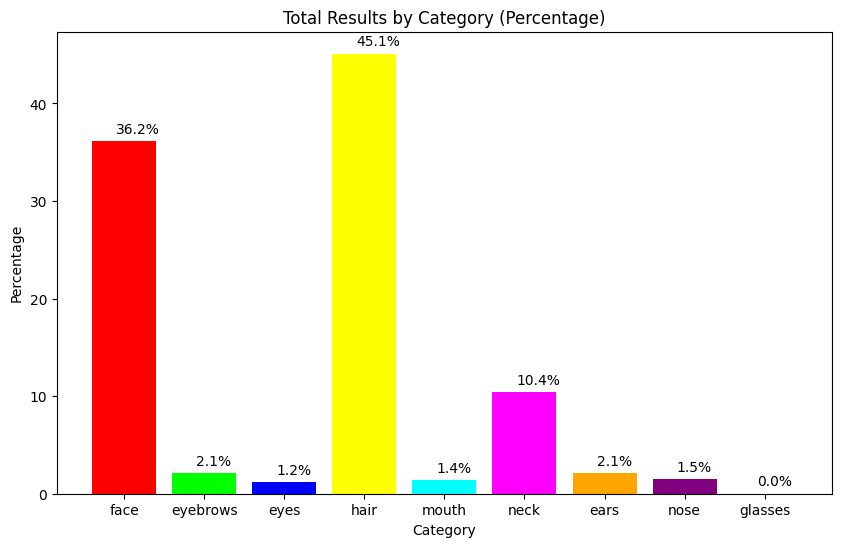

In [ ]:
import matplotlib.pyplot as plt


COLORS = {'face': [255, 0, 0],
          'eyebrows': [0, 255, 0],
          'eyes': [0, 0, 255],
          'hair': [255, 255, 0],
          'mouth': [0, 255, 255],
          'neck': [255, 0, 255],
          'ears': [255, 165, 0],
          'nose': [128, 0, 128],
          'glasses': [165, 42, 42]}

# Extracting the data for plotting
categories = list(TOTAL_RESULTS.keys())
counts = list(TOTAL_RESULTS.values())
colors = [tuple(color) for color in COLORS.values()]

# Normalizing RGB colors to [0, 1] range for matplotlib
colors = [(r/255, g/255, b/255) for r, g, b in colors]

# Calculating percentages
total_count = sum(counts)
percentages = [(count / total_count) * 100 for count in counts]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, percentages, color=colors)

# Adding title and labels
plt.title('Total Results by Category (Percentage)')
plt.xlabel('Category')
plt.ylabel('Percentage')

# Displaying the percentage above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 0.5, f'{yval:.1f}%', va='bottom')

plt.show()


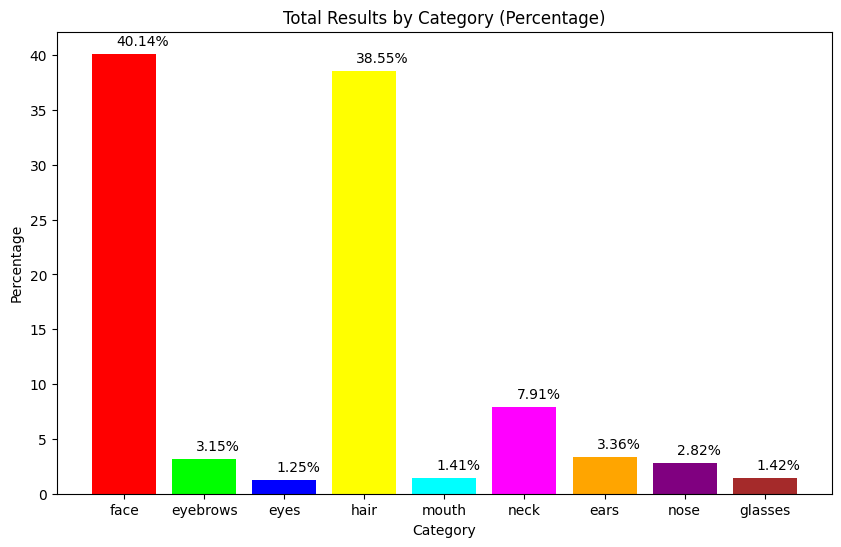

In [ ]:
import matplotlib.pyplot as plt

# Data
PERCENTAGES = {'face': 40.14,
               'eyebrows': 3.15,
               'eyes': 1.25,
               'hair': 38.55,
               'mouth': 1.41,
               'neck': 7.91,
               'ears': 3.36,
               'nose': 2.82,
               'glasses': 1.42}

COLORS = {'face': [255, 0, 0],
          'eyebrows': [0, 255, 0],
          'eyes': [0, 0, 255],
          'hair': [255, 255, 0],
          'mouth': [0, 255, 255],
          'neck': [255, 0, 255],
          'ears': [255, 165, 0],
          'nose': [128, 0, 128],
          'glasses': [165, 42, 42]}

# Extracting the data for plotting
categories = list(PERCENTAGES.keys())
percentages = list(PERCENTAGES.values())
colors = [tuple(color) for color in COLORS.values()]

# Normalizing RGB colors to [0, 1] range for matplotlib
colors = [(r/255, g/255, b/255) for r, g, b in colors]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, percentages, color=colors)

# Adding title and labels
plt.title('Total Results by Category (Percentage)')
plt.xlabel('Category')
plt.ylabel('Percentage')

# Displaying the percentage above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 0.5, f'{yval:.2f}%', va='bottom')

plt.show()


# test

In [ ]:
from autodistill_clip import CLIP
from autodistill.detection import CaptionOntology
from autodistill_grounded_sam import GroundedSAM
import supervision as sv

from autodistill.core.composed_detection_model import ComposedDetectionModel
import cv2

classes = ["eyes", 'nose', 'mouth']


SAMCLIP = ComposedDetectionModel(
    detection_model=GroundedSAM(
        CaptionOntology({"human face parts and parts of head": "human face parts and parts of head"})
    ),
    classification_model=CLIP(
        CaptionOntology({k: k for k in classes})
    )
)

IMAGE = "/content/deepfake_0076.png"

results = SAMCLIP.predict(IMAGE)

image = cv2.imread(IMAGE)

annotator = sv.MaskAnnotator()
label_annotator = sv.LabelAnnotator()

# # labels = [
# #     f"{classes[class_id]} {confidence:0.2f}"
# #     for _, _, confidence, class_id, _ in results
# # ]
# labels = [
#     f"{CLASSES[class_id]} {confidence:0.2f}"
#     for xyxy, mask, confidence, class_id, _, data in results]

# annotated_frame = annotator.annotate(
#     scene=image.copy(), detections=results
# )
# annotated_frame = label_annotator.annotate(
#     scene=annotated_frame, labels=labels, detections=results
# )

# sv.plot_image(annotated_frame, size=(8, 8))

trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


The `device` argument is deprecated and will be removed in v5 of Transformers.
torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
None of the inputs have requires_grad=True. Gradients will be None


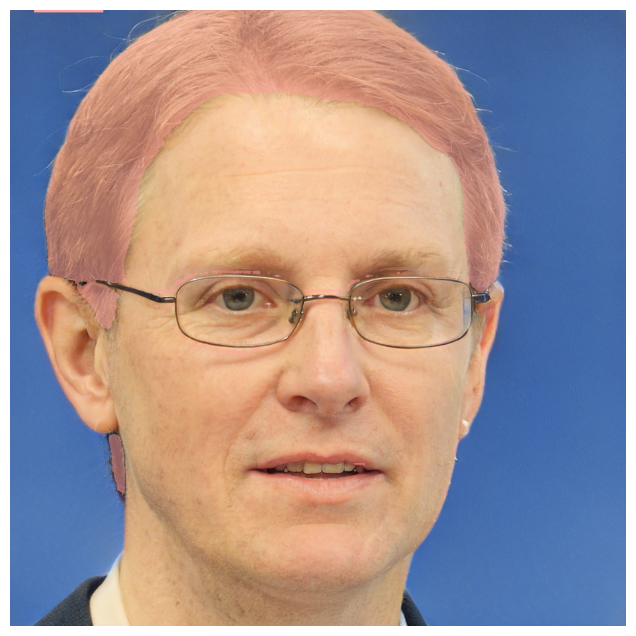

In [ ]:

labels = [
    f"{classes[class_id]} {confidence:0.2f}"
    for xyxy, mask, confidence, class_id, _, data in results]

annotated_frame = annotator.annotate(
    scene=image.copy(), detections=results
)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame, labels=labels, detections=results
)

sv.plot_image(annotated_frame, size=(8, 8))

In [ ]:
print(results)

Detections(xyxy=array([[ 40.32431  ,   3.4995117, 840.1041   , 971.2235   ]],
      dtype=float32), mask=array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]]), confidence=array([0.5394091], dtype=float32), class_id=array([2]), tracker_id=None, data={})
